In [1]:
# Imports for initial statistical analysis
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the csv and store it in a dataframe
data_path = "heart_statlog_cleveland_hungary_final.csv"
contents = pd.read_csv(data_path)

df = pd.DataFrame(contents)
print(df)

      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

In [3]:
def getDescriptiveStatistics(df : pd.DataFrame, column : str):
    return {
        "Mean": np.mean(df[column]),
        "Mode": statistics.mode(df[column]),
        "Quartile 1": statistics.quantiles(df[column])[0],
        "Median": np.median(df[column]),
        "Quartile 3": statistics.quantiles(df[column])[2],
        "Variance": np.var(df[column]),
        "Standard Deviation": np.std(df[column])
    }

for column in df.columns.values:
    print(f"{column}:")
    print(getDescriptiveStatistics(df, column))
    print()


age:
{'Mean': 53.72016806722689, 'Mode': 54, 'Quartile 1': 47.0, 'Median': 54.0, 'Quartile 3': 60.0, 'Variance': 87.50236635830802, 'Standard Deviation': 9.354269953251725}

sex:
{'Mean': 0.7638655462184873, 'Mode': 1, 'Quartile 1': 1.0, 'Median': 1.0, 'Quartile 3': 1.0, 'Variance': 0.18037497351881926, 'Standard Deviation': 0.4247057493357245}

chest pain type:
{'Mean': 3.2327731092436975, 'Mode': 4, 'Quartile 1': 3.0, 'Median': 4.0, 'Quartile 3': 4.0, 'Variance': 0.8743881081844503, 'Standard Deviation': 0.9350872195599993}

resting bp s:
{'Mean': 132.15378151260504, 'Mode': 120, 'Quartile 1': 120.0, 'Median': 130.0, 'Quartile 3': 140.0, 'Variance': 337.13013275898595, 'Standard Deviation': 18.36110380012558}

cholesterol:
{'Mean': 210.36386554621848, 'Mode': 0, 'Quartile 1': 188.0, 'Median': 229.0, 'Quartile 3': 270.0, 'Variance': 10277.471803544948, 'Standard Deviation': 101.37786643811828}

fasting blood sugar:
{'Mean': 0.2134453781512605, 'Mode': 0, 'Quartile 1': 0.0, 'Median': 0

# Determining Correlation

The first thing we want to establish for the classifier is what variables are highly correlated and can predict each other relatively well.  We can do this by performing a correlation analysis on each of the quantitative variables, then attempt to use those with the strongest relations.  For this case, I will use the Pearson method:

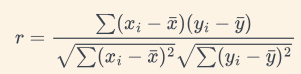

In [31]:
# Test variables, expected correlation for (x, y) should be 0.974894414261588
x = np.array([1, 3, 5, 7, 8, 9, 10, 15])
y = np.array([10, 20, 30, 40, 50, 60, 70, 80])

def getPearsonCorrelation(X, Y):
    if len(X) == len(Y):
        numerator = 0
        denominator_x = 0
        denominator_y = 0
        x_mean = X.mean()
        y_mean = Y.mean()
        for idx in range(len(X)):
            numerator += (X[idx] - x_mean) * (Y[idx] - y_mean)
            denominator_x += (X[idx] - x_mean)**2
            denominator_y += (Y[idx] - y_mean)**2
        
        return numerator / np.sqrt(denominator_x * denominator_y)

    return 0

if getPearsonCorrelation(x, y) != 0.974894414261588:
    print("Something's wrong with Pearson!")

# Determine which variables have the greatest correlation with age.
sub_df = pd.DataFrame([df['age'], df['resting bp s'], df['cholesterol'], df['max heart rate']])
sub_df = sub_df.transpose()

max_correlation = 0
max_labels = [None, None]

for cat1 in sub_df.loc[:]:
    temp_df = sub_df.loc[:, sub_df.columns != cat1]
    for cat2 in temp_df:
        new_correlation = getPearsonCorrelation(sub_df[cat1], sub_df[cat2])
        if max_correlation < new_correlation:
            max_correlation = new_correlation
            max_labels[0] = cat1
            max_labels[1] = cat2

print(f"The variables with the greatest correlation are {max_labels[0]} and {max_labels[1]} with a value of {max_correlation}")

The variables with the greatest correlation are age and resting bp s with a value of 0.2576921280059918


# Correlation for Heart Disease

For this case, I want to determine which variables by themselves have the greatest correlation with the target variable.  I will use the pandas `corr()` function for ease of handling with the qualitative variables.

In [28]:
# Find the correlation of all variables in the data set
correlation_table = df.corr()
df.corr()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


In [36]:
# Nullify the matching rows and columns to avoid claiming that a variable has the greatest correlation with itself.
for var1 in correlation_table:
    for var2 in correlation_table:
        if var1 == var2:
            correlation_table.loc[var1, var2] = 0.0

# Determine what variables are most strongly correlated with target.
print(f"\
The variable with the greatest correlation to the target is {correlation_table.loc[:, 'target'].idxmax()} \
with a value of {correlation_table.loc[:, 'target'].max()} \
")


The variable with the greatest correlation to the target is ST slope with a value of 0.5056079709572009 


# Analysis

From above, we can see that using ST slope to predict the target variable is best since the correlation with it is greatest among the entire dataset.